## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 10
---------------------------------------

GOALS:

1. Practice the principles of good data visualization.
2. Work on more advanced plotting.

----------------------------------------------------------

This homework has **2 questions** and **2 exercises**.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_name = 'data/brexit.csv'
DF = pd.read_csv(file_name)

## Do opinions about Brexit depend on region?
###### Answer: Yes, they do. Different regions have different amounts of yes and no votes.
**Am I clearly answering my question with these pictures?**
###### Answer: I would say your clearly answering the questions with these pictures.

In [3]:
mask = DF['location'] != 'total'
DF_plot=DF[mask]

DF_plot['location'].replace('london','London',inplace=True)
DF_plot['location'].replace('rest_of_south','Rest of South',inplace=True)
DF_plot['location'].replace('midlands_wales','Midlands and Wales',inplace=True)
DF_plot['location'].replace('north','North',inplace=True)
DF_plot['location'].replace('scot','Scotland',inplace=True)

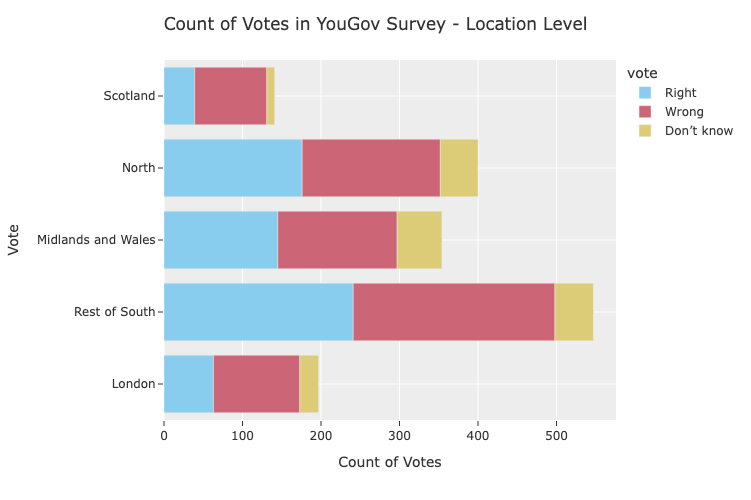

In [4]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='location',x='count',
             color='vote',
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories },
                  title='Count of Votes in YouGov Survey - Location Level',
                  xaxis_title="Count of Votes",
                  yaxis_title="Vote",
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

In [5]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

**Q** Which of the plots do you think is better. What you do notice are the pluses and minuses of each figure?

In [6]:
#I think that the second graph is better because it is easier to see the information in it, but theres a lot gpoing on. The first one is cleaned up better and has the same amount of information, but you have to look harder for the information.

**Q** Is there any redundancy in the second graph? What is redundant?

In [7]:
#Yes, there is redundancy in the second graph. The location being told twice is redundant.

## Avoid Redundancy

Here is the same graph again, but avoiding redundancy.

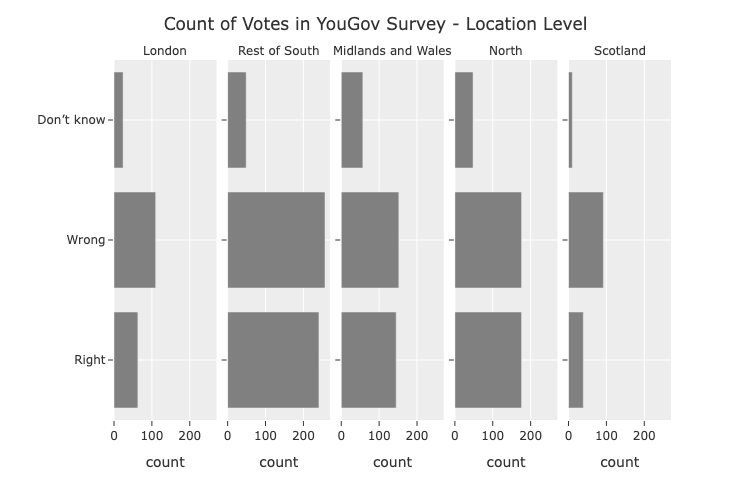

In [8]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             facet_col='location',
            color_discrete_sequence=['gray'])

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='Count of Votes in YouGov Survey - Location Level',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500)

fig.show()

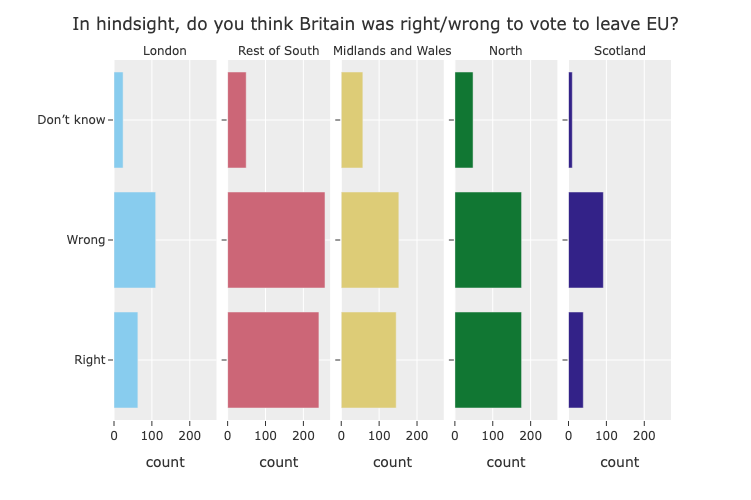

In [9]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='location',
             facet_col='location',
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()

**Q** Which of these two plots do you like better and why?

In [10]:
#I like the second graph better because it's more colorful, which makes it more interesting.

## Selecting meaningful colors.

[colorbrewer.org](https://colorbrewer2.org/)

Here is an example where colors were picked on the website above and the the codes were put into the color_discrete_map.

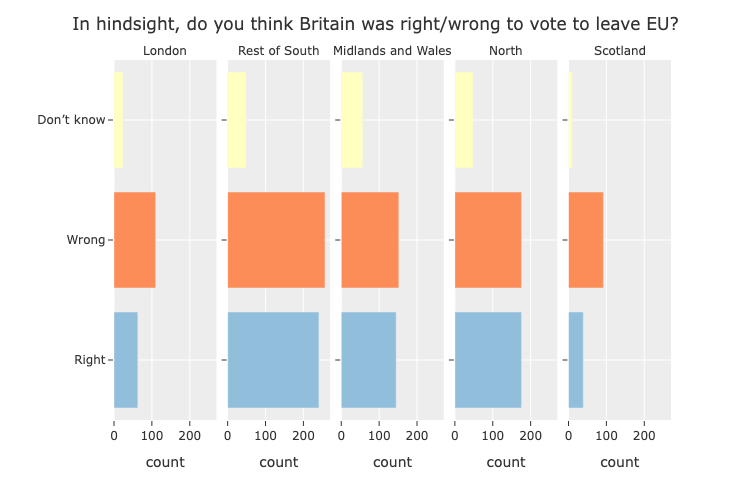

In [11]:
my_categories = ['London','Rest of South','Midlands and Wales','North','Scotland']

fig = px.bar(DF_plot,y='vote',x='count',
             color='vote',
             facet_col='location',
             color_discrete_map={'Right':'#91bfdb','Wrong':'#fc8d59',"Don’t know":'#ffffbf'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

my_categories = ['Dont know','Right','Wrong']
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  title='In hindsight, do you think Britain was right/wrong to vote to leave EU?',
                  yaxis_title="",
                  template='ggplot2',
                  legend_title='Location',
                  autosize=False,
                  width=1000,
                  height=500,
                 showlegend=False)

fig.show()


### Exercise 1 (Choose one!)

#### Data Vis Principles:

1. Order Matters
2. Put long categories on the y-axis
3. Pick a Purpose.
4. Keep scales consistent
5. Select meaningful colors
6. Use meaningful and nonredundant labels.

**Option 1.** 

Create your own plot of this data. Make it as nice as possible! Choose your own colors, themes, labels, ordering, etc. Decide if you prefer facets or colored bars. Make the labels as informative as possible. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

**Option 2.**

Using data of your choice, create a beautiful data visualization. Try experimenting with things we haven't yet covered in class: look up how to add a caption or include textures in your plot.

Talk about the positives and negatives of your graph. How does it meet, not meet, or exceed the data visualization principles above?

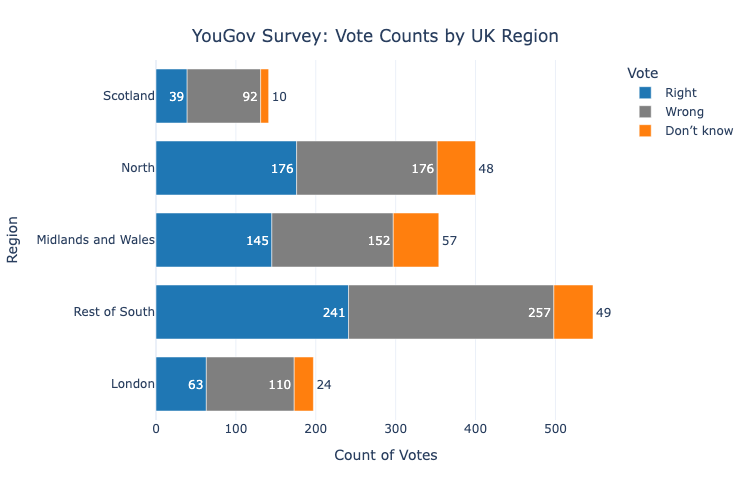

In [14]:
my_categories = ['London', 'Rest of South', 'Midlands and Wales', 'North', 'Scotland']

fig = px.bar(
    DF_plot,
    y='location',
    x='count',
    color='vote',
    text='count',  
    color_discrete_sequence=["#1f77b4", "#7f7f7f", "#ff7f0e"],  
    orientation='h' )

fig.update_layout(
    title={
        'text': 'YouGov Survey: Vote Counts by UK Region',
        'x': 0.5,  
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Count of Votes",
    yaxis_title="Region",
    template='plotly_white',
    yaxis=dict(
        categoryorder='array',
        categoryarray=my_categories ),
    legend_title_text='Vote',
    bargap=0.25,  
    width=850,
    height=500)
fig.update_traces(
    texttemplate='%{text:,}',  
    textposition='outside',
    hovertemplate="<b>%{y}</b><br>Vote: %{color}<br>Count: %{x:,}<extra></extra>")

fig.show()